# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

lat = []
lng = []
city_id = []
wind = []
hum = []
max_tmp = []
country = []
cloudiness = []
city_name = []
date = []

for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        hum.append(response['main']['humidity'])
        max_tmp.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        city_id.append(response['id'])
        city_name.append(response['name'])
        date.append(response['dt'])
        #print(f"Processing {cities[city]} | {city}")
    except: KeyError 
        
       #print(f"No data returnd for " {city}: "skipping.")
        
        
    
    print(city)


sao mateus do sul
jamestown
albany
nizhneyansk
san policarpo
punta arenas
banyumas
padang
cidreira
ratnagiri
bluff
sur
rikitea
padilla
saint-philippe
pevek
cape town
weihai
dikson
trincomalee
turukhansk
sao luiz gonzaga
samusu
kapaa
jalu
kundiawa
khalkhal
bambous virieux
mount isa
tiarei
dalby
saskylakh
sibi
chagda
palas
manzanillo
talnakh
avarua
tongliao
khatanga
yellowknife
lebu
barentsburg
iqaluit
vallenar
walvis bay
ayan
batemans bay
necochea
mataura
torbay
souillac
nagorsk
bilibino
ushuaia
fortuna
muromtsevo
zapolyarnyy
tuktoyaktuk
laguna
marsh harbour
lokosovo
busselton
tambul
qaanaaq
namatanai
mahebourg
ballina
meulaboh
posse
severo-kurilsk
kantunilkin
mahibadhoo
atuona
kodiak
egvekinot
puerto ayora
chuy
vila velha
evanston
mount gambier
faanui
hermanus
taolanaro
muros
bredasdorp
la palma
upernavik
sao joao da barra
sofiysk
guerrero negro
dingle
ha giang
khorramshahr
emerald
tumannyy
amderma
dickson
arraial do cabo
srednekolymsk
abu dhabi
vaini
dujuma
kahului
santa maria del rio

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City Name": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": hum,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": max_tmp,
    "Wind Speed": wind
    
}

weather_df = pd.DataFrame(weather_dict)

weather_df.to_csv(output_data_file)

weather_df.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Sao Mateus do Sul,0,BR,1580044480,46,-25.87,-50.38,75.33,0.94
1,Jamestown,99,US,1580044480,95,42.10,-79.24,33.01,10.00
2,Albany,53,US,1580044481,90,42.60,-73.97,35.01,4.38
3,San Policarpo,7,PH,1580044481,88,12.18,125.51,79.57,8.55
4,Punta Arenas,92,CL,1580044481,58,-53.15,-70.92,53.01,23.00


In [7]:
south_forgets = weather_df.loc[weather_df["Latitude"]<= 0, :]

south_forgets.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Sao Mateus do Sul,0,BR,1580044480,46,-25.87,-50.38,75.33,0.94
4,Punta Arenas,92,CL,1580044481,58,-53.15,-70.92,53.01,23.00
5,Banyumas,85,ID,1580044453,83,-7.51,109.29,79.97,2.24
6,Padang,100,ID,1580044481,97,-0.95,100.35,71.10,0.58
7,Cidreira,7,BR,1580044481,63,-30.18,-50.21,75.87,8.03


In [8]:
north_remembers = weather_df.loc[weather_df["Latitude"] >= 0, :]


north_remembers.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
1,Jamestown,99,US,1580044480,95,42.10,-79.24,33.01,10.00
2,Albany,53,US,1580044481,90,42.60,-73.97,35.01,4.38
3,San Policarpo,7,PH,1580044481,88,12.18,125.51,79.57,8.55
8,Ratnagiri,1,IN,1580044481,51,16.98,73.30,82.62,7.58
10,Sur,47,OM,1580044482,65,22.57,59.53,70.65,15.21


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

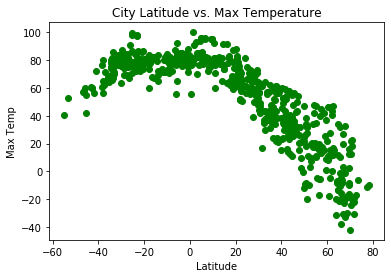

In [23]:
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(weather_df[["Latitude"]], weather_df[["Max Temperature"]], marker="o", color="green")
plt.show()

In [24]:
print("The above scatter plot is showing the max temeratures of the cities in the list with respect to their latitidues.")
print("From the plot, it appears that the further notrh a city is the lower the max temp. But not nearly so much of a differnce the further south.")

The above scatter plot is showing the max temeratures of the cities in the list with respect to their latitidues.
From the plot, it appears that the further notrh a city is the lower the max temp. But not nearly so much of a differnce the further south.


#### Latitude vs. Humidity Plot

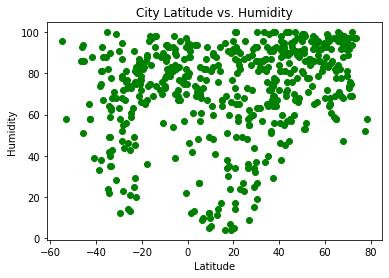

In [10]:
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(weather_df[["Latitude"]], weather_df[["Humidity"]], marker="o", color="green")
plt.show()

In [ ]:
print("This is a sctter plot showing humidity with respect to latitide. This plot suggests that latitude is not closely related to humidity of a city.")

#### Latitude vs. Cloudiness Plot

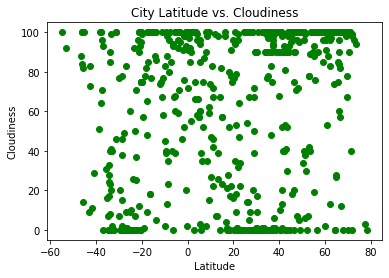

In [11]:
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(weather_df[["Latitude"]], weather_df[["Cloudiness"]], marker="o", color="green")
plt.show()

In [ ]:
print("The lattitide to cloudiness sctter plot also indicates no strong relationship between latitude of a city and how cloudy it may be.")

#### Latitude vs. Wind Speed Plot

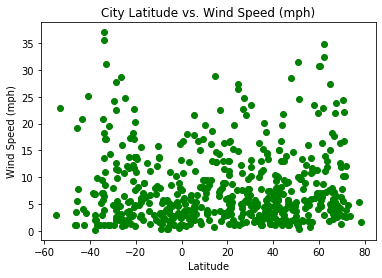

In [12]:
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(weather_df[["Latitude"]], weather_df[["Wind Speed"]], marker="o", color="green")
plt.show()

In [ ]:
print("Wind speed is typically low accross all latitudes per this scatter plot.")

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots


In [14]:
# Create Northern and Southern Hemisphere DataFrames

# Coded this earlier in th 'north_remembers and sout_forgets dataframes'


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

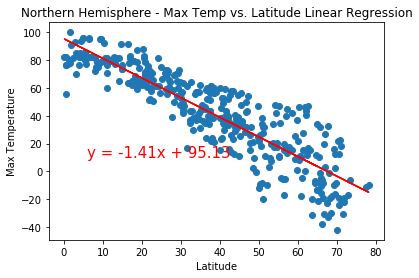

In [15]:
x_values = north_remembers['Latitude']
y_values = north_remembers['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

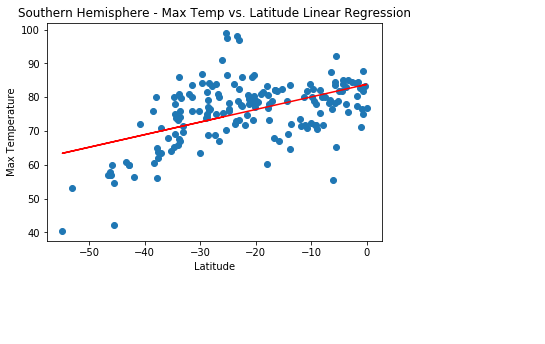

In [16]:
x_values = south_forgets['Latitude']
y_values = south_forgets['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

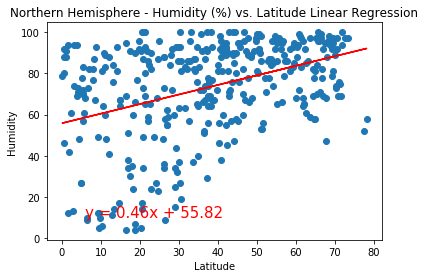

In [17]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

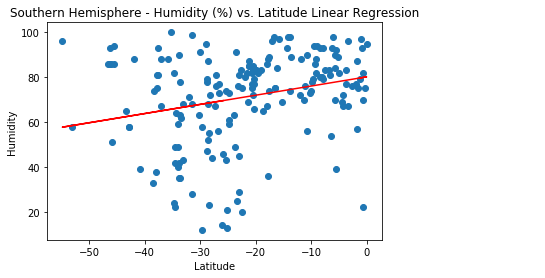

In [18]:
x_values = south_forgets['Latitude']
y_values = south_forgets['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

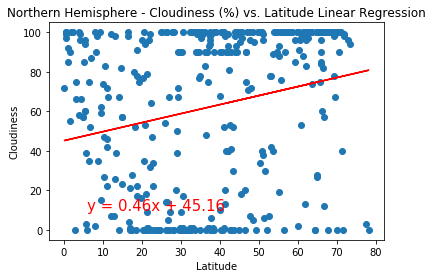

In [19]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

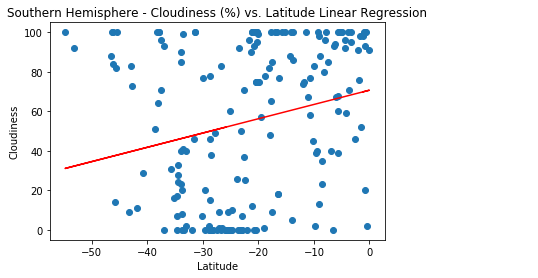

In [20]:
x_val = south_forgets['Latitude']
y_val = south_forgets['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

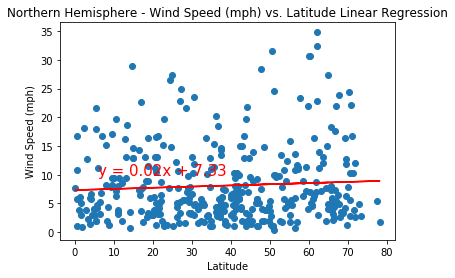

In [21]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

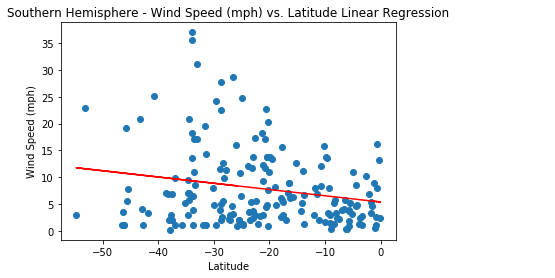

In [22]:
x_val = south_forgets['Latitude']
y_val = south_forgets['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()